In [6]:
import random
import numpy as np
import igraph as ig

In [7]:
def Creation(n):
    
    g = ig.Graph.Lattice(dim=[n,n], circular=False)

    N = len(g.vs)
    m = random.randrange(0,N)
    n = N-m
    a = np.ones(N)
    a[:m] = 0
    np.random.shuffle(a)
    A = np.array(np.reshape(a,(len(a),1)))

    g.vs["original_id"] = list(range(g.vcount()))
    g.vs["spin"] = list(a)
    
    return g

In [8]:
def Plot_IGraph(g):

    visual_style = {}
    visual_style["vertex_size"] = 10
    visual_style["bbox"] = (300, 300)
    visual_style["vertex_label"] = g.vs["original_id"]
    color_dict = {1.0: "yellow", 0.0 : "white"}
    visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["spin"]]
    ##############################################################################
    edge_colors = []
    for edge in g.get_edgelist():

        a = g.vs[edge[0]]["spin"]
        b = g.vs[edge[1]]["spin"]

        if a == b:

            if a == b == 1.0:
                    edge_colors.append("red")
            if a == b == 0.0:
                    edge_colors.append("green")

        else:
            edge_colors.append("lightgrey")
    ##############################################################################
    visual_style["edge_color"] = edge_colors
    
    return visual_style

In [9]:
def frustration_count(g):
    s = 0
    for edge in g.get_edgelist():
        a = g.vs[edge[0]]["spin"]
        b = g.vs[edge[1]]["spin"]
        if a == b:
            s+=1
    return s

def color_of_frustration(g):
    p=0
    n=0        
    for edge in g.get_edgelist():
        a = g.vs[edge[0]]["spin"]
        b = g.vs[edge[1]]["spin"]
        if a == b or b == a:
            if a == b == 1.0:
                n +=1
            if b == a == 0.0:
                p +=1       
    return p,n

def calculate_delta(g):
    p,n = color_of_frustration(g)
    if p>n:
        return int(np.sqrt((p-n)**2))
    else:
        return int(np.sqrt((n-p)**2))

220
104 12
46 58


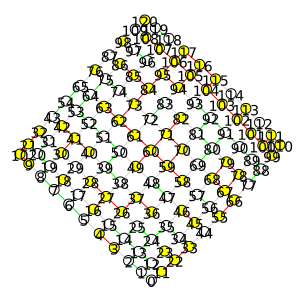

In [11]:
g = Creation(11)

f = frustration_count(g)
d = calculate_delta(g)
p,n = color_of_frustration(g)

print(g.ecount())
print(f,d)
print(p,n)

visual_style = Plot_IGraph(g)
ig.plot(g, **visual_style)

# Rewiring

In [14]:
# https://networkx.org/documentation/stable/_modules/networkx/algorithms/swap.html#connected_double_edge_swap
from networkx.utils import py_random_state

import networkx as nx

@py_random_state(3)

def connected_double_edge_swap(g, nswap=1, _window_threshold=3, seed=None):

    n = 0
    swapcount = 0

    deg = g.degree()

    dk = [v.index for v in g.vs]
    cdf = nx.utils.cumulative_distribution(g.degree())
    discrete_sequence = nx.utils.discrete_sequence
    window = 1

    while n < nswap:
        wcount = 0
        swapped = []
        if window < _window_threshold:
            fail = False
            while wcount < window and n < nswap:
                (ui, xi) = discrete_sequence(2, cdistribution=cdf, seed=seed)
                if ui == xi:
                    continue
                u = dk[ui]
                x = dk[xi]
                v = seed.choice(list(g.neighbors(u)))
                y = seed.choice(list(g.neighbors(x)))
                if v == y:
                    continue
                if x not in g.neighbors(u) and y not in g.neighbors(v):
                    g.delete_edges([(u, v)])
                    g.delete_edges([(x, y)])
                    g.add_edge(u, x)
                    g.add_edge(v, y)
                    swapped.append((u, v, x, y))
                    swapcount += 1
                n += 1
                #https://stackoverflow.com/questions/13855617/check-if-two-vertices-are-connected-in-igraph
                #print("has_path",u,v,g.get_eid(u, v, directed=False, error=False))
                #print(g.get_shortest_paths(u,to=v))
                if len(g.get_shortest_paths(u,to=v)) != 0:
                    #print("has path")#,g.get_eid(u, v, directed=False, error=False))
                    wcount += 1
                else:
                    g.add_edge(u, v)
                    g.add_edge(x, y)
                    g.delete_edges([(u, x)])
                    g.delete_edges([(v, y)])
                    swapcount -= 1
                    fail = True
            if fail:
                window = int(math.ceil(window / 2))
            else:
                window += 1

        else:
            while wcount < window and n < nswap:
                (ui, xi) = nx.utils.discrete_sequence(2, cdistribution=cdf)
                if ui == xi:
                    continue
                u = dk[ui]
                x = dk[xi]
                v = seed.choice(list(g.neighbors(u)))
                y = seed.choice(list(g.neighbors(x)))
                if v == y:
                    continue
                if x not in g.neighbors(u) and y not in g.neighbors(v):
                    g.delete_edges([(u, v)])
                    g.delete_edges([(x, y)])
                    g.add_edge(u, x)
                    g.add_edge(v, y)
                    swapped.append((u, v, x, y))
                    swapcount += 1
                n += 1
                wcount += 1
            #print(g.is_connected())
            if g.is_connected():
                window += 1
            else:
                while swapped:
                    (u, v, x, y) = swapped.pop()
                    g.add_edge(u, v)
                    g.add_edge(x, y)
                    g.delete_edges([(u, x)])
                    g.delete_edges([(v, y)])
                    swapcount -= 1
                window = int(math.ceil(window / 2))
    return swapcount

40
18 12
3 15


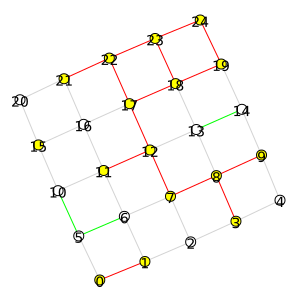

In [12]:
g = Creation(5)

f = frustration_count(g)
d = calculate_delta(g)
p,n = color_of_frustration(g)

print(g.ecount())
print(f,d)
print(p,n)


visual_style = Plot_IGraph(g)
ig.plot(g, **visual_style)

40
16 12
2 14


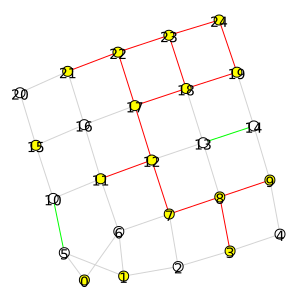

In [15]:
connected_double_edge_swap(g)

f = frustration_count(g)
d = calculate_delta(g)
p,n = color_of_frustration(g)

print(g.ecount())
print(f,d)
print(p,n)

visual_style = Plot_IGraph(g)
ig.plot(g, **visual_style)

# Quench

In [46]:
N = 36

g0 = Creation(N)


edge_number = g0.ecount()
print(edge_number)

2520


In [47]:
from tqdm import tqdm
import time

gs = []
start_time = time.time()
for i in tqdm(range(1000)):
    
    gi = Creation(36)
    
    di = calculate_delta(gi)
    fi = frustration_count(gi)
        
    if di != fi:
        gs.append(gi)

print(time.time() - start_time) 

100%|██████████| 1000/1000 [00:04<00:00, 225.67it/s]

4.43327784538269


In [48]:
from collections import Counter

avg = []
for g in tqdm(gs):
    
    f = frustration_count(g)
    d = calculate_delta(g)
    
    avg.append((f,d))
    
AVG = Counter(avg)

print(AVG)

100%|██████████| 967/967 [00:04<00:00, 240.80it/s]

Counter({(2258, 2240): 2, (1387, 835): 2, (1303, 461): 2, (2271, 2257): 2, (2063, 2015): 2, (2226, 2204): 2, (1275, 333): 2, (2367, 2359): 1, (1260, 158): 1, (1238, 258): 1, (1433, 895): 1, (1264, 264): 1, (1245, 327): 1, (1344, 694): 1, (1879, 1781): 1, (2088, 2050): 1, (1282, 16): 1, (1830, 1636): 1, (1276, 200): 1, (2388, 2386): 1, (1385, 799): 1, (1568, 1188): 1, (1994, 1928): 1, (1283, 361): 1, (2262, 2244): 1, (1432, 946): 1, (1323, 535): 1, (1302, 60): 1, (1400, 784): 1, (1450, 1046): 1, (1478, 1066): 1, (1556, 1216): 1, (1459, 1087): 1, (1553, 1243): 1, (1321, 579): 1, (1422, 972): 1, (1312, 334): 1, (1243, 199): 1, (1292, 374): 1, (1310, 294): 1, (1505, 1137): 1, (1540, 1170): 1, (2441, 2439): 1, (1299, 571): 1, (2363, 2353): 1, (1470, 1000): 1, (1949, 1847): 1, (1763, 1611): 1, (1469, 997): 1, (1228, 14): 1, (2017, 1973): 1, (1269, 601): 1, (2088, 2052): 1, (1598, 1278): 1, (1284, 620): 1, (1266, 430): 1, (1738, 1560): 1, (1410, 872): 1, (1284, 500): 1, (2073, 2041): 1, (1843

In [49]:
selected_gs = []
for g in tqdm(gs):
    if (frustration_count(g),calculate_delta(g)) == (1275, 333):
        selected_gs.append(g)
        if len(selected_gs) == 2:
            break

 69%|██████▉   | 671/967 [00:02<00:01, 243.15it/s]


In [50]:
def Quench(gs):
    total=[]
    for index,g0 in tqdm(enumerate(gs)):
        specific_avg = []
        for i in range(100):
            res=[]
            res.append(frustration_count(g0))
            G = g0.copy()
            for k in (range(1,100)):
                connected_double_edge_swap(G)
                res.append(frustration_count(G))
            specific_avg.append(res)
        total.append(specific_avg) 
    return np.array(total)

In [51]:
data = Quench(selected_gs)

2it [00:52, 26.06s/it]


In [64]:
np.save("p220_119.npy",data)

In [114]:
data = np.load("p220_119.npy")

In [112]:
def Get_Probabilites2(data,Edge,repeat):
    
    avg_P_t = []
    for a in data:
        p_t=[]
        for t in range(len(a[0])):

            prob=[]
            for i in range(0,Edge):
                prob.append(np.count_nonzero(np.array(a[:,t]) == i))
            p_t.append(np.array(prob)/repeat)

        P_t = np.array(p_t)
        avg_P_t.append(P_t)

    return np.array(avg_P_t)

In [115]:
edge_number = 220

avg_P_t = Get_Probabilites2(data,edge_number,100)

print(np.shape(avg_P_t))

#avg_P_t[:,5]

avg_P = []
for t in range(100):
    avg_p = []
    for i in range(edge_number):
        #print(i)
        #print(avg_P_t[:,t,i],np.mean(avg_P_t[:,t,i]),np.std(avg_P_t[:,t,i]))
        avg_p.append((np.mean(avg_P_t[:,t,i]),np.std(avg_P_t[:,t,i])))
    avg_P.append(avg_p)
    #break
    #print(avg_P_t[i,5])
    #avg_p.append(np.mean(avg_P_t[:,5][0]))
    
p_even=[]
for l in avg_P:
    p_even.append(l[1::2])

P_even = np.array(p_even)

(90, 100, 220)


In [116]:
import os

f = open("/home/sven/Desktop/p220_119.txt",'r')


p_true=[]
for line in f:
    
    if len(line.rstrip("\n"))==1:
            p_true.append(0)
    else:
        p_true.append(float((line.rstrip("\n")).replace("*^","e")))#.replace("`50.","")))
        
p_true = np.array(p_true)
p_true = np.delete(p_true, -1)


In [107]:
"""
f = open("/home/sven/Desktop/p2520_333.txt",'r')

p_true =[]
for line in f:
    if len(line.rstrip("\n"))==1:
            p_true.append(0)
    else:
        p_true.append(float((line.rstrip("\n")).replace("*^","e").replace("`50.","")))
p_true = np.array(p_true)

p_true = np.delete(p_true, -1)
"""

'\nf = open("/home/sven/Desktop/p2520_333.txt",\'r\')\n\np_true =[]\nfor line in f:\n    if len(line.rstrip("\n"))==1:\n            p_true.append(0)\n    else:\n        p_true.append(float((line.rstrip("\n")).replace("*^","e").replace("`50.","")))\np_true = np.array(p_true)\n\np_true = np.delete(p_true, -1)\n'

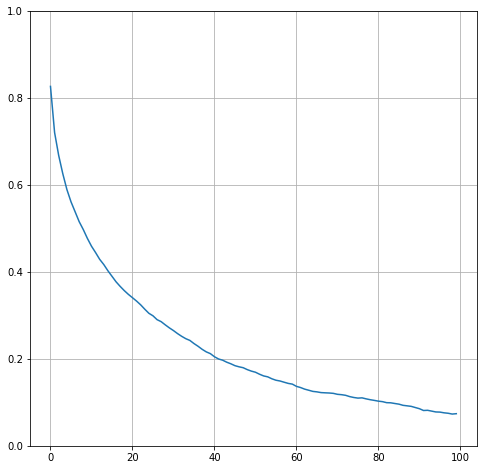

In [117]:
from scipy.spatial.distance import jensenshannon

import matplotlib.pyplot as plt
%matplotlib inline


JS = []

P = np.array(p_true)[1::2]
#print(np.round(P[P!=0],2))
    
for i in range(len(avg_P)):
    
    p = np.array(p_true)[1::2]
    q = np.array([k for k,j in avg_P[i]])[1::2]
    
    #print(q[q!=0])
    
    #print(p,q)
    
    js_pq1 = jensenshannon(p,q,base=2)
    #print(js_pq1)
    JS.append(js_pq1)
    #print('JS(Q || P) Distance: %.3f' % js_pq1,JS[i])
    
fig,ax = plt.subplots(figsize=[8,8])

ax.plot([i for i in range(len(JS))],JS)
ax.grid()
ax.set_ylim(0,1)
plt.show()

In [119]:
import random
import matplotlib
import tkinter as Tk
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.widgets import TextBox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

matplotlib.use('TkAgg')

root = Tk.Tk()
root.wm_title("Embedding in TK")
fig = plt.Figure(figsize=(15,15))
canvas = FigureCanvasTkAgg(fig, root)
canvas.get_tk_widget().pack(side=Tk.TOP, fill=Tk.BOTH, expand=1)


###############################################

ax=fig.add_subplot(111)
fig.subplots_adjust(bottom=0.25)

#fig.suptitle('L='+str(l)+', d='+str(k), fontsize=16)

t=0

x = [i for i in range(len(avg_P[t]))]
y = np.array([i for i,j in avg_P[t]])
y_err = np.array([j for i,j in avg_P[t]])

ax.errorbar(x,y,y_err,capsize=3)
l12  = ax.fill_between(x, y - y_err, y + y_err,facecolor="blue",alpha=0.2)#, alpha=0.25)#, edgecolor="black")


x = [i*2+1 for i in range(len(P_even[t]))]
y = np.array([i for i,j in P_even[t]])
y_err = np.array([j for i,j in P_even[t]])

ax.errorbar(x,y,y_err,capsize=3)
l12  = ax.fill_between(x, y - y_err, y + y_err,facecolor="red",alpha=0.2)#, alpha=0.25)#, edgecolor="black")


#ax.plot([i for i in range(len(p30_13))],p30_13,color="red")
ax.plot([i*2+1 for i in range(len(p_true[::2]))], p_true[::2],color="red")
ax.scatter([i*2+1 for i in range(len(p_true[::2]))], p_true[::2],color="red")


ax.set_ylim(0,1)
#ax.set_xlim(2650,2750)
ax.set_xlabel("f")
ax.set_ylabel("P(f)")
ax.grid()

###############################################
ax_time = fig.add_axes([0.12, 0.1, 0.78, 0.03])
s_time = Slider(ax_time, 'Time', 0, 99, valinit=0)

tekstić = ax.text(0.05, 0.95, s_time.val, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
###############################################



from mpl_toolkits.axes_grid.inset_locator import inset_axes

# this is an inset axes over the main axes
inset_axes = inset_axes(ax, 
                    width="30%", # width = 30% of parent_bbox
                    height=2.0, # height : 1 inch
                    loc=1)
#n, bins, patches = plt.hist(s, 400)
xs = np.linspace(0,1)
#inset_axes.plot(xs,np.sin(xs))
inset_axes.plot([i for i in range(len(JS))],JS)
inset_axes.scatter(t,JS[t])

inset_axes.set_xscale('log')
inset_axes.set_ylim(0,1)
inset_axes.grid()
#line2 = plt.axvline(x=t,linestyle="-",color="red")
#line3 = plt.axhline(y=data3[t,0],linestyle="-",color="red")
#plt.ylabel('f(t)', fontsize=10)
#plt.xlabel('t', fontsize=10)
#plt.grid()


###############################################

def update(val):
    
    ax.cla()
    ax.set_ylim(0,1)
    #ax.set_xlim(2650,2750)
    ax.grid()

    value = int(s_time.val)

    #l11.set_ydata([i for i,j in avg_P[value]])
    
        
    x = [i for i in range(len(avg_P[value]))]
    y = np.array([i for i,j in avg_P[value]])
    y_err = np.array([j for i,j in avg_P[value]])
    
    #ax.errorbar(x,y,y_err,capsize=3)
    #ax.fill_between(x, y - y_err, y + y_err,facecolor="blue",alpha=0.2)
    
    
    x = [i*2+1 for i in range(len(P_even[value]))]
    y = np.array([i for i,j in P_even[value]])
    y_err = np.array([j for i,j in P_even[value]])
    
    ax.errorbar(x,y,y_err,capsize=3)
    ax.scatter(x,y)
    ax.fill_between(x, y - y_err, y + y_err,facecolor="red",alpha=0.2)
    
    #ax.plot([i for i in range(len(p30_13))],p30_13,color="red")
    ax.plot([i*2+1 for i in range(len(p_true[1::2]))], p_true[1::2],color="red")
    ax.scatter([i*2+1 for i in range(len(p_true[1::2]))], p_true[1::2],color="red")
    #l12.set_y
    
    inset_axes.cla()
    inset_axes.plot([i for i in range(len(JS))],JS)
    inset_axes.scatter(value,JS[value])
    inset_axes.set_xscale('log')
    inset_axes.set_ylim(0,1)
    inset_axes.grid()
    
    fig.canvas.draw_idle()

from tkinter import Button
Button(root, text="Quit", command=root.destroy).pack()
    
    
s_time.on_changed(update)

Tk.mainloop()